In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox

from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

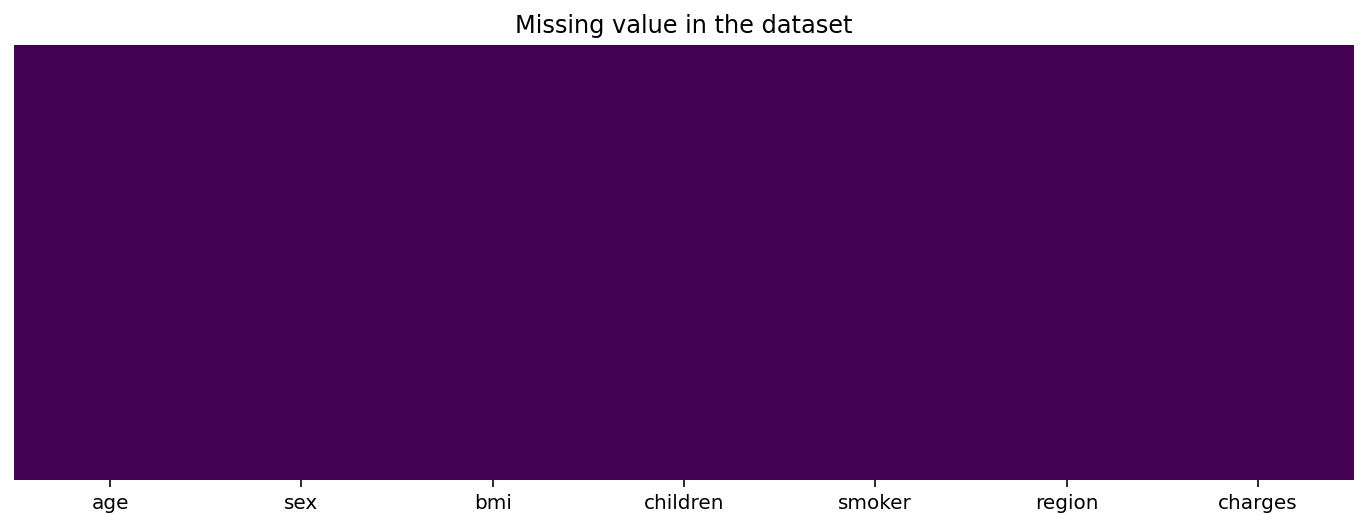

In [4]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0, 0.5, 'charges')

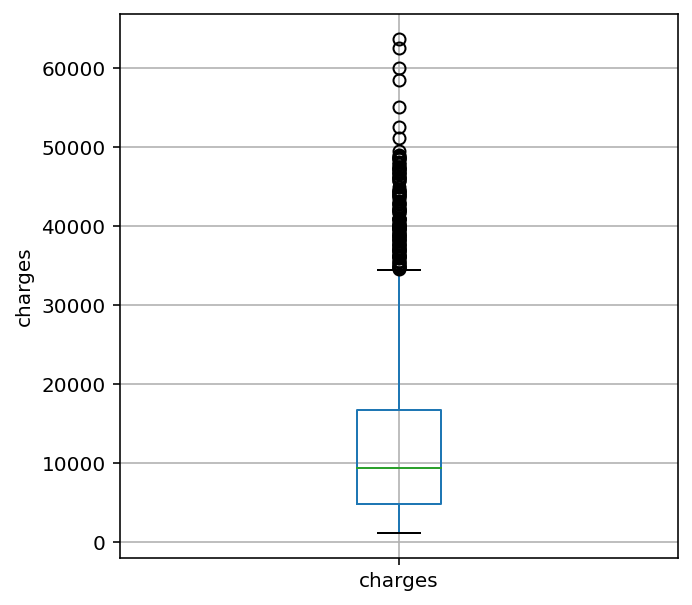

In [7]:
plt.figure(figsize =(5,5))

plt.subplot (1,1,1)
fig = df.boxplot(column = 'charges')
fig.set_title('')
fig.set_ylabel ('charges')


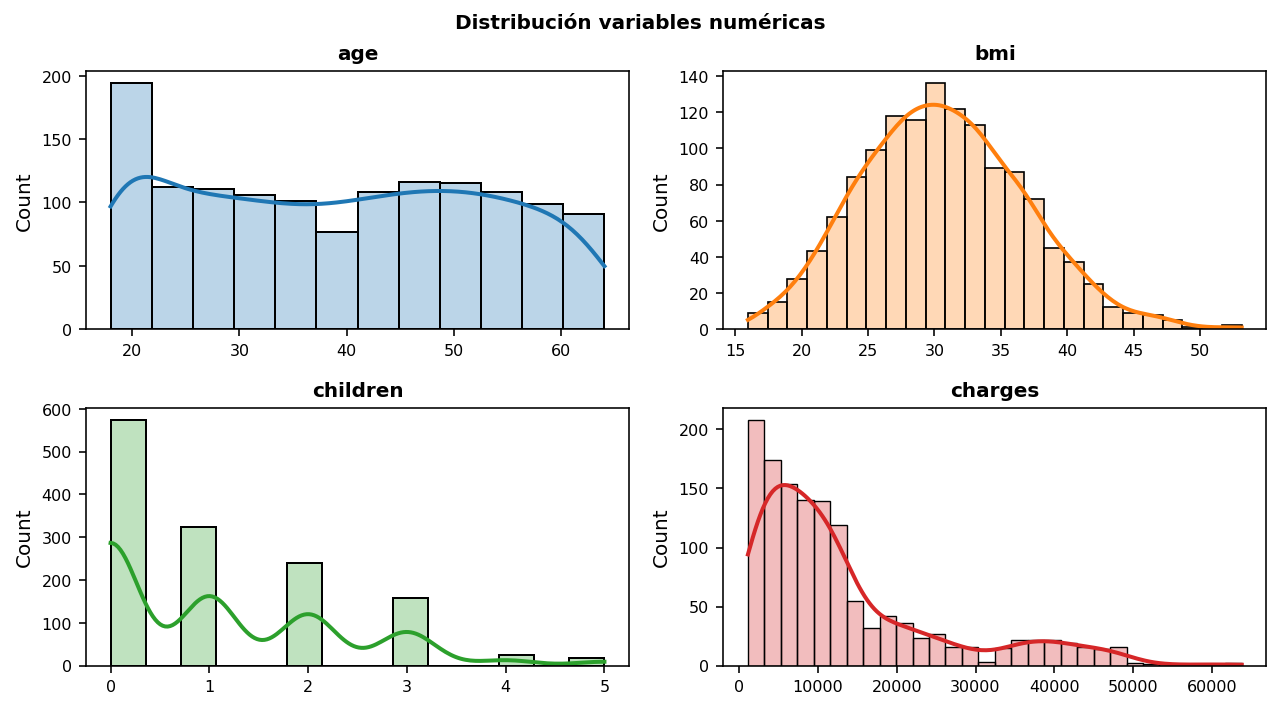

In [8]:
fig, axes = plt.subplots(2,2, figsize=(9, 5))
axes = axes.flat
#columnas_numeric = [var for var in df.columns if df[var].dtype !='O' ]
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

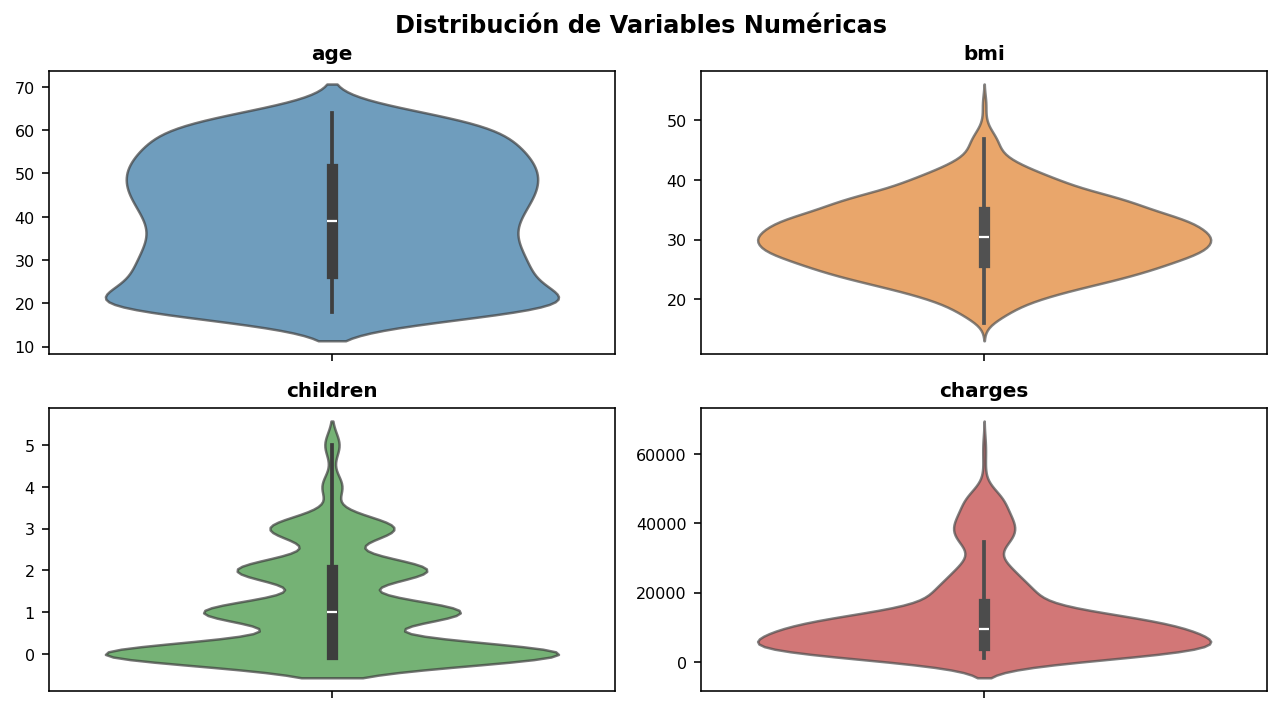

In [9]:
fig, axes = plt.subplots(2,2, figsize=(9, 5))
axes = axes.flat
#columnas_numeric = [var for var in df.columns if df[var].dtype !='O' ]
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
for i, column in enumerate(columnas_numeric):
    sns.violinplot(
        data    = df,
        y       = column,  # Cambiado x por y para una visualización vertical estándar
        ax      = axes[i], # Referencia al objeto de ejes correcto
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        alpha   = 0.7  # Ajustar la transparencia
    )
    axes[i].set_title(column, fontsize=10, fontweight='bold')
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Ajustar el layout de la figura
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de Variables Numéricas', fontsize=12, fontweight='bold')
plt.show()

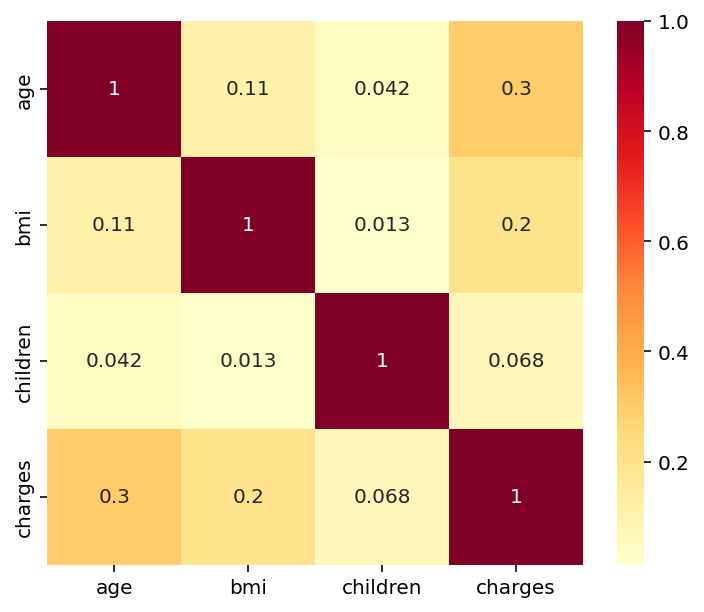

In [10]:
plt.figure (figsize = (6,5))
corr = df[columnas_numeric].corr()
sns.heatmap(corr, cmap = 'YlOrRd', annot= True);

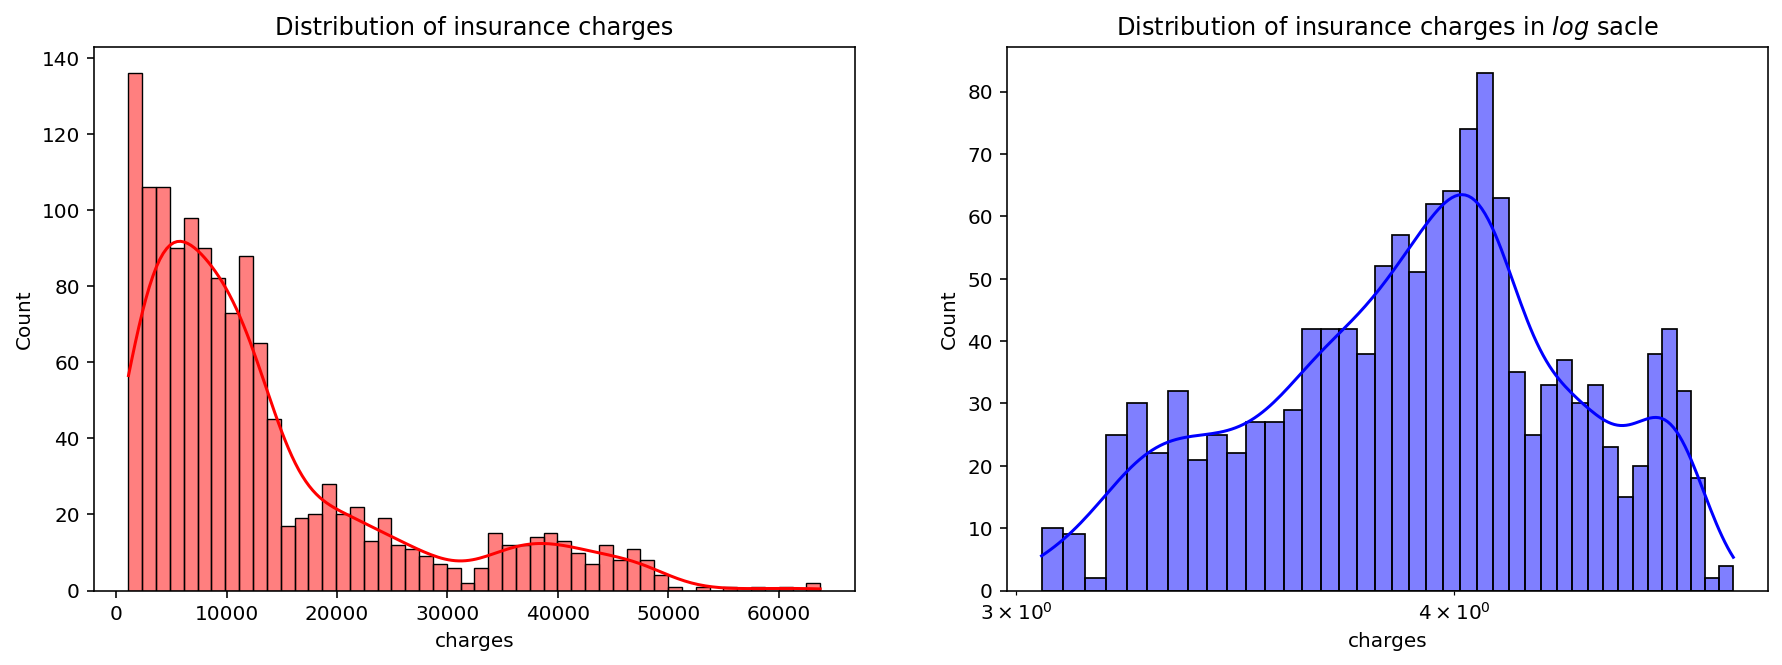

In [11]:
f= plt.figure(figsize=(15, 5))

ax=f.add_subplot(121)
sns.histplot(df['charges'],bins=50,color='r',kde=True,ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.histplot(np.log10(df['charges']),bins=40,color='b',kde=True,ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

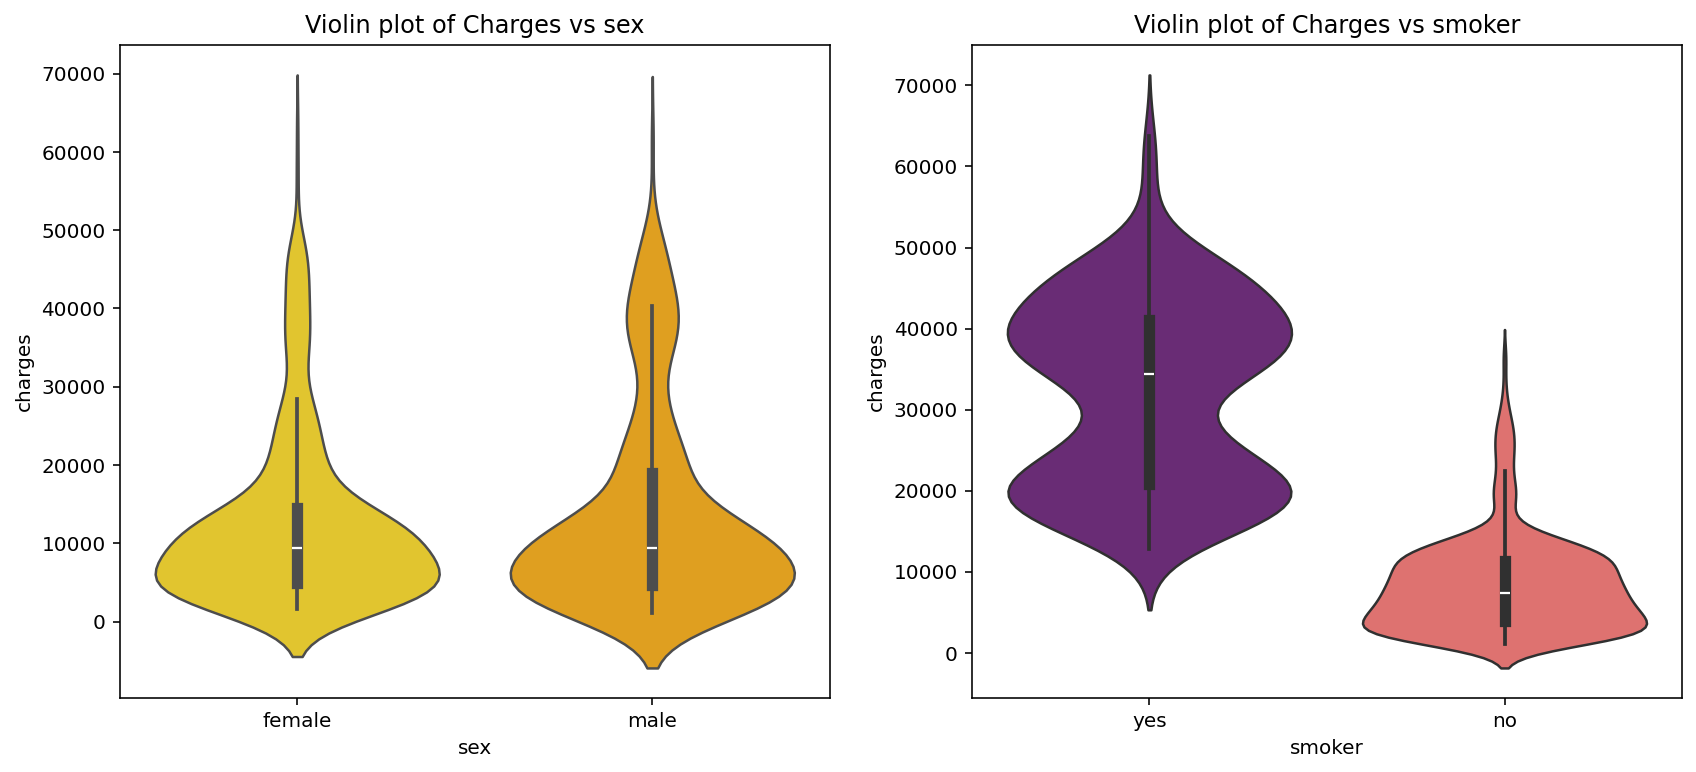

In [12]:
f = plt.figure(figsize=(14,6))

ax = f.add_subplot(121)
sns.violinplot(x = 'sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

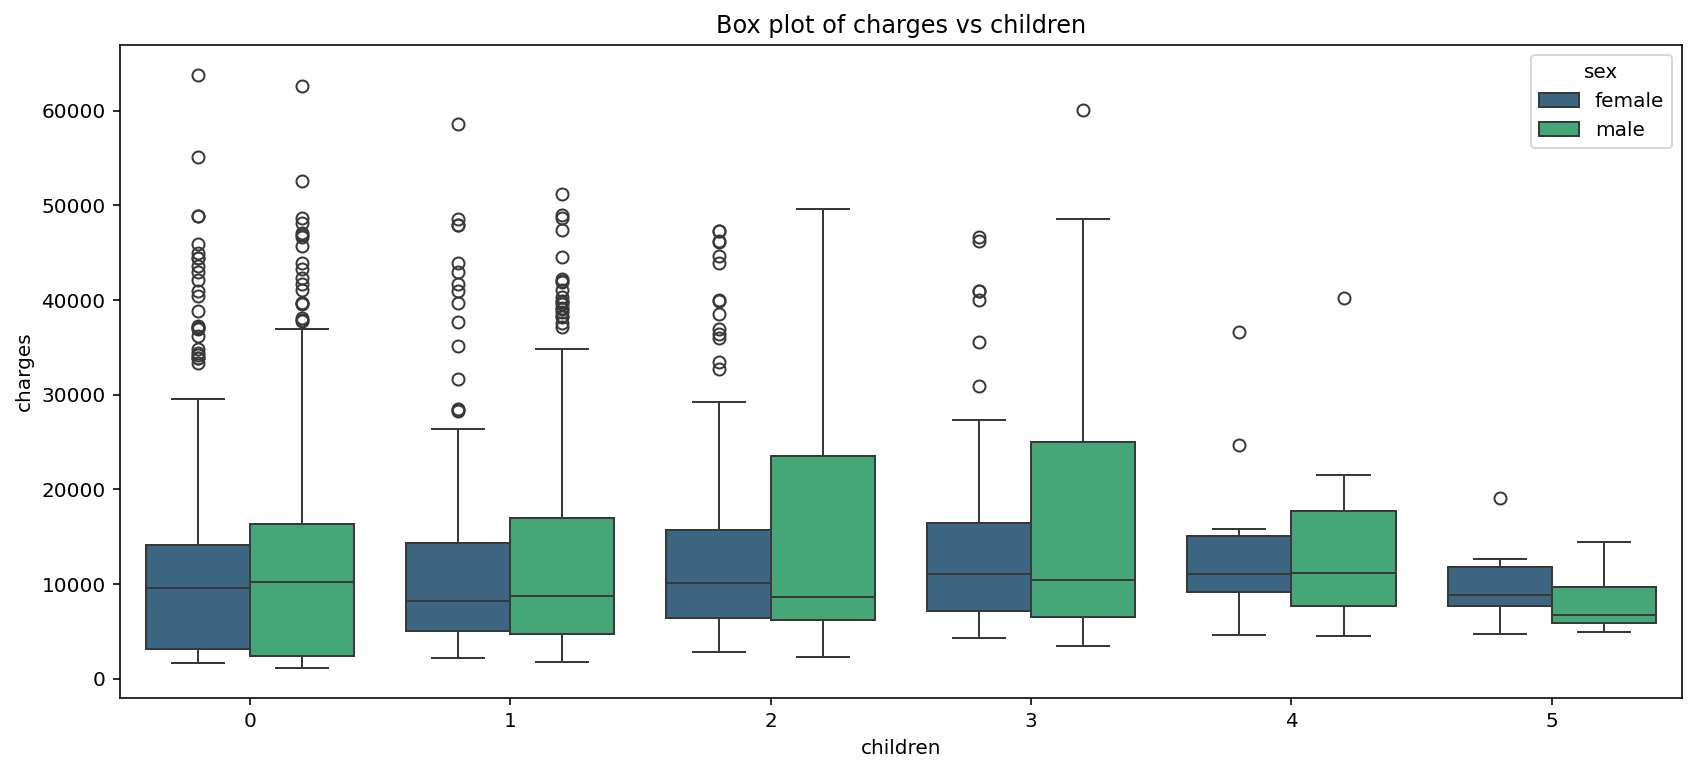

In [13]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='viridis')
plt.title('Box plot of charges vs children');

In [14]:
round(df.groupby(['children'])['charges'].agg(['mean','min', 'max']),2)

,mean,min,max
children,,,
0,12365.98,1121.87,63770.43
1,12731.17,1711.03,58571.07
2,15073.56,2304.00,49577.66
3,15355.32,3443.06,60021.40
4,13850.66,4504.66,40182.25
5,8786.04,4687.80,19023.26


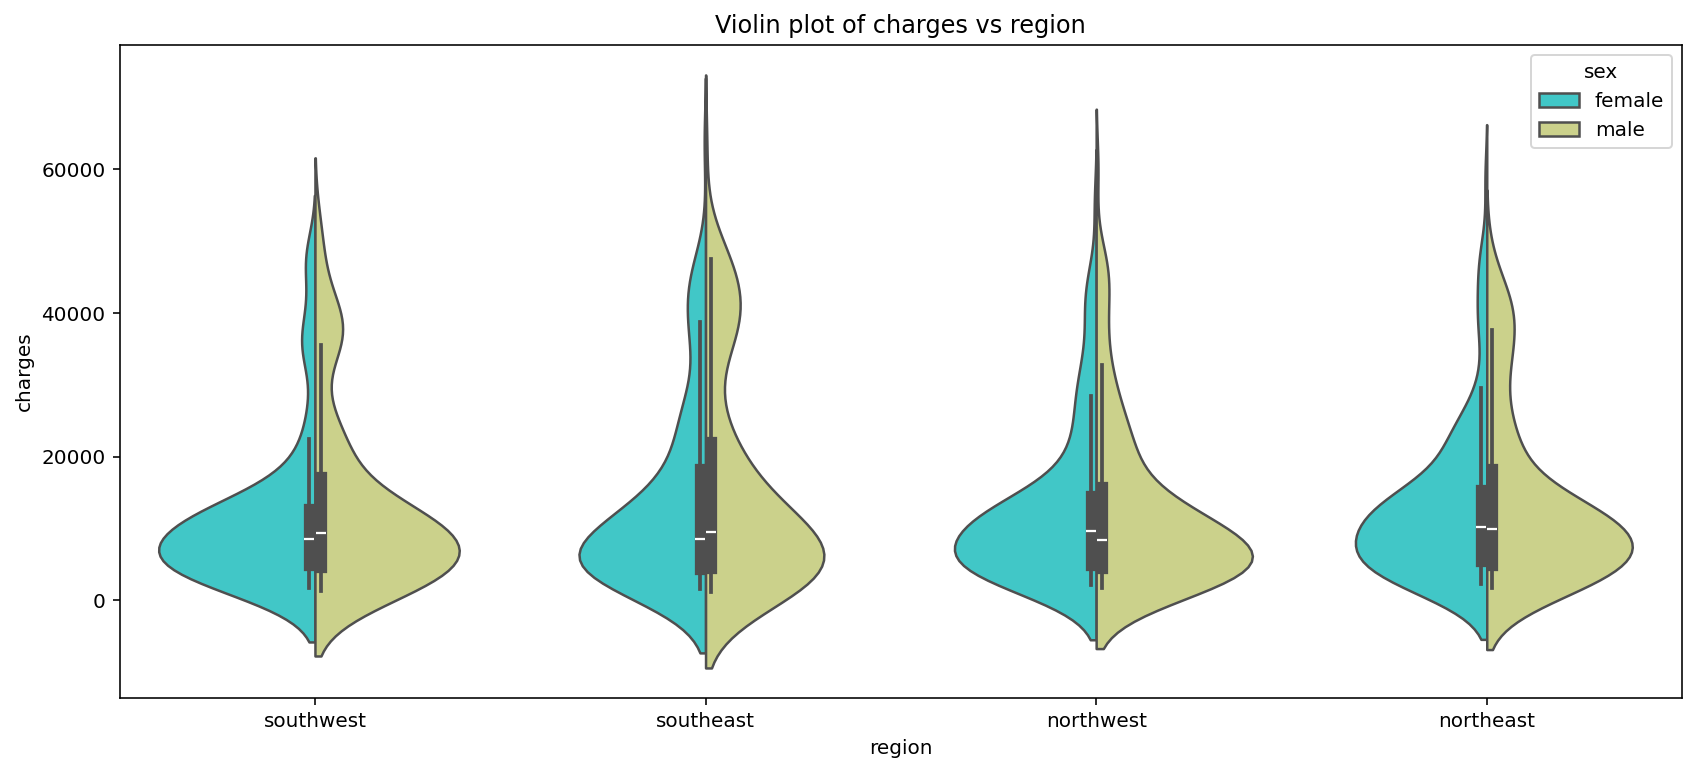

In [15]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs region');

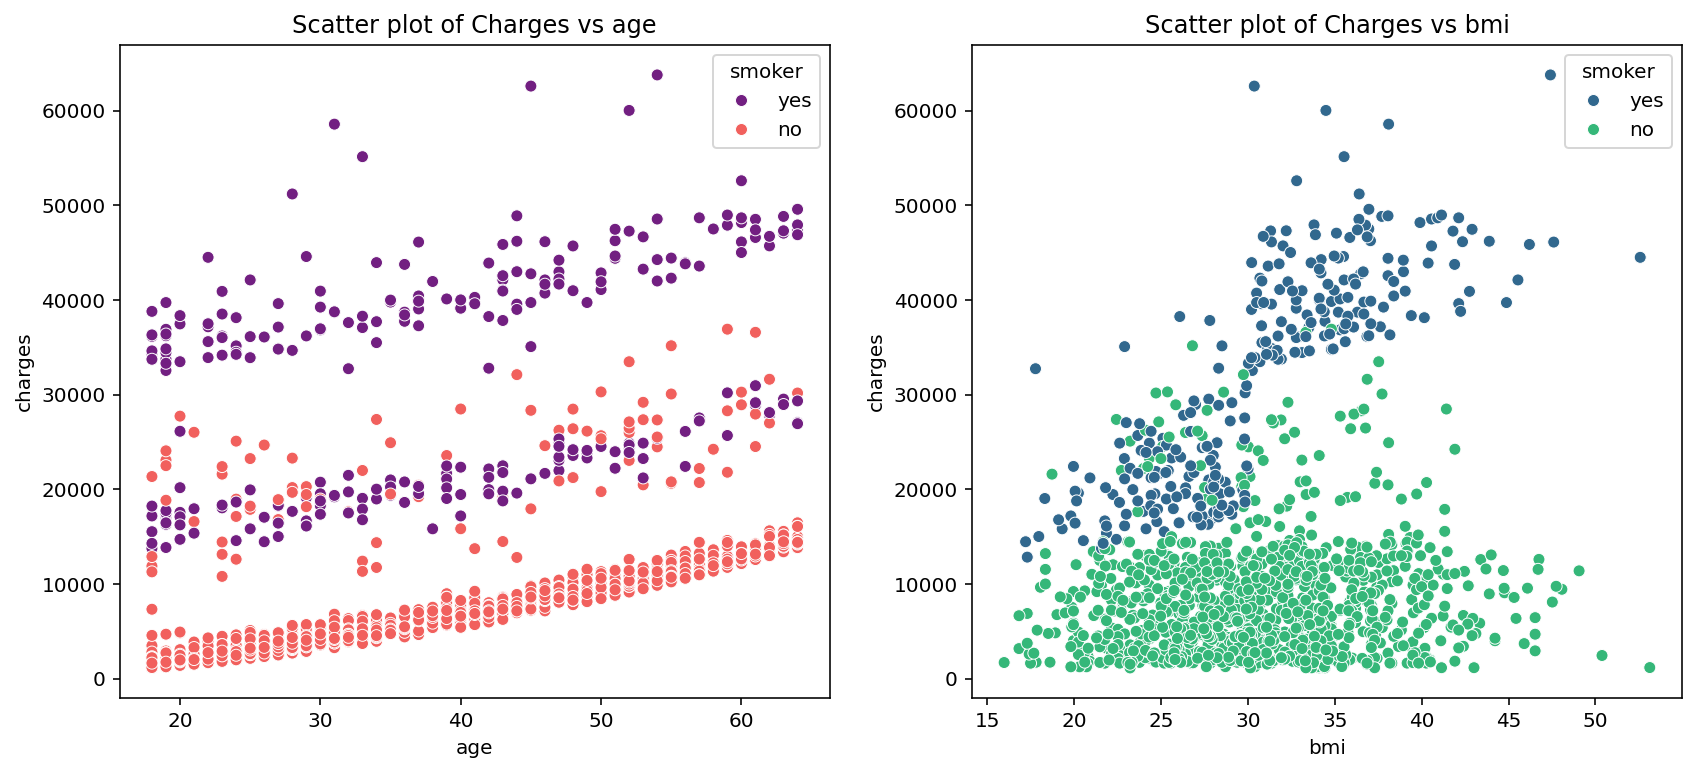

In [16]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
categorical.append('children')
categorical

['sex', 'smoker', 'region', 'children']

In [19]:
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_', columns = categorical, drop_first = True, dtype = 'int8' )
df_encode.head()

,age,bmi,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5
0,19,27.900,16884.92400,0,1,0,0,1,0,0,0,0,0
1,18,33.770,1725.55230,1,0,0,1,0,1,0,0,0,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,1,0,0
3,33,22.705,21984.47061,1,0,1,0,0,0,0,0,0,0
4,32,28.880,3866.85520,1,0,1,0,0,0,0,0,0,0


In [20]:
#Box-Cox transformation
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

ci, lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [21]:
df_encode['charges'] = np.log(df_encode['charges'])

In [22]:
df_encode

,age,bmi,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5
0,19,27.900,9.734176,0,1,0,0,1,0,0,0,0,0
1,18,33.770,7.453302,1,0,0,1,0,1,0,0,0,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,1,0,0
3,33,22.705,9.998092,1,0,1,0,0,0,0,0,0,0
4,32,28.880,8.260197,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,9.268661,1,0,1,0,0,0,0,1,0,0
1334,18,31.920,7.698927,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,7.396233,0,0,0,1,0,0,0,0,0,0
1336,21,25.800,7.604867,0,0,0,0,1,0,0,0,0,0


In [23]:
X = df_encode.drop('charges', axis = 1)
y = df_encode['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 23)

In [24]:
#θ=(X.T*X)^−1*X.T*y
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

In [25]:
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))

In [26]:
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})
parameter_df

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,7.059171
1,theta_1,age,0.033134
2,theta_2,bmi,0.013517
3,theta_3,OHE_male,-0.067767
4,theta_4,OHE_yes,1.550481
5,theta_5,OHE_northwest,-0.055845
6,theta_6,OHE_southeast,-0.146578
7,theta_7,OHE_southwest,-0.133508
8,theta_8,OHE_1,0.149457
9,theta_9,OHE_2,0.272919


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


sk_theta = [lin_reg.intercept_] + list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_yes,1.550481,1.550481
5,theta_5,OHE_northwest,-0.055845,-0.055845
6,theta_6,OHE_southeast,-0.146578,-0.146578
7,theta_7,OHE_southwest,-0.133508,-0.133508
8,theta_8,OHE_1,0.149457,0.149457
9,theta_9,OHE_2,0.272919,0.272919


In [29]:
#Model evaluation
y_pred_test = lin_reg.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error

J_mse_test = mean_squared_error(y_pred_test, y_test)
R_square_test = lin_reg.score(X_test,y_test)
print ('Error cuadratico medio: ',J_mse_test)
print('\n')
print('R cuadrado: ',R_square_test)

Error cuadratico medio:  0.18729622322981887


R cuadrado:  0.7795687545055319


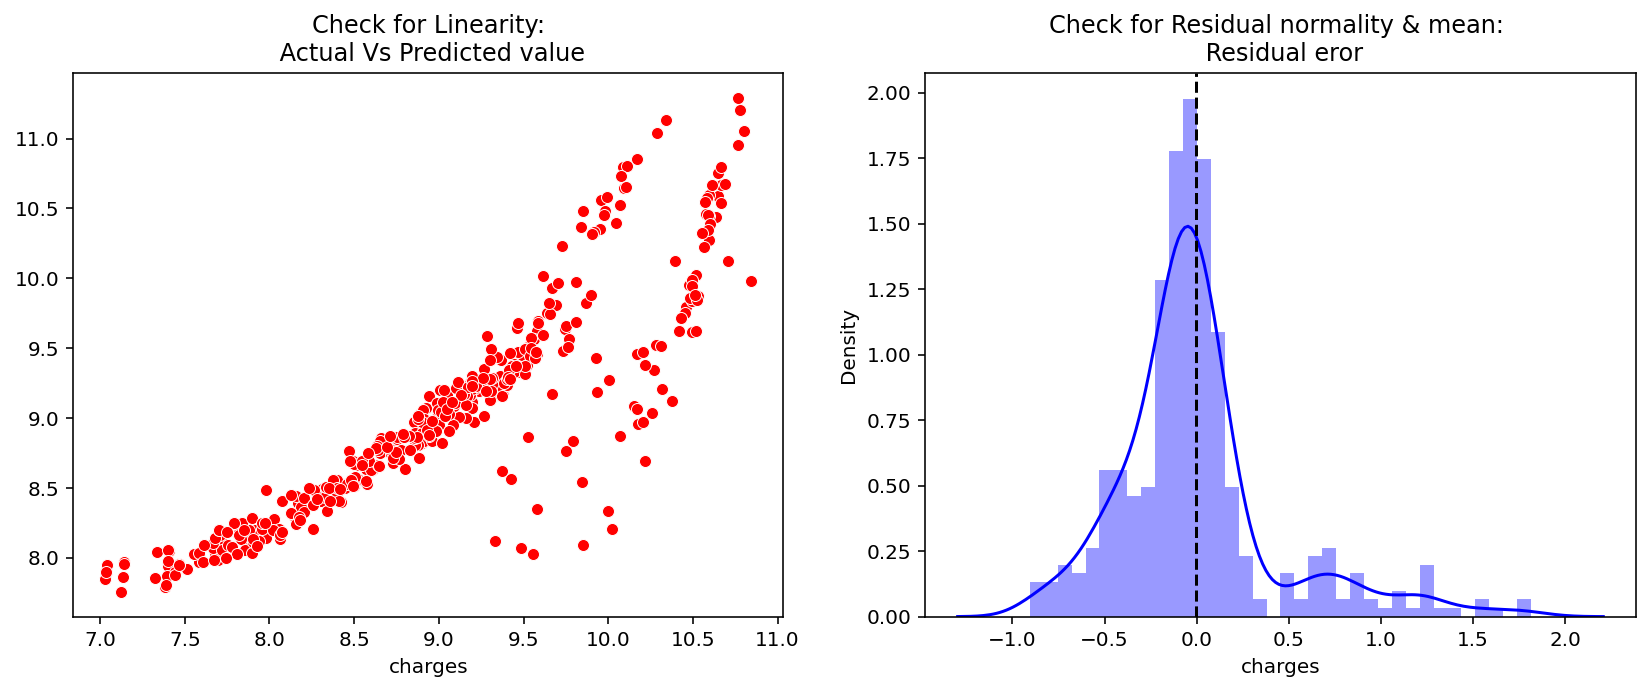

In [31]:
#Model Validation
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x= y_test,y = y_pred_test,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_test),ax=ax,color='b')
ax.axvline((y_test - y_pred_test).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

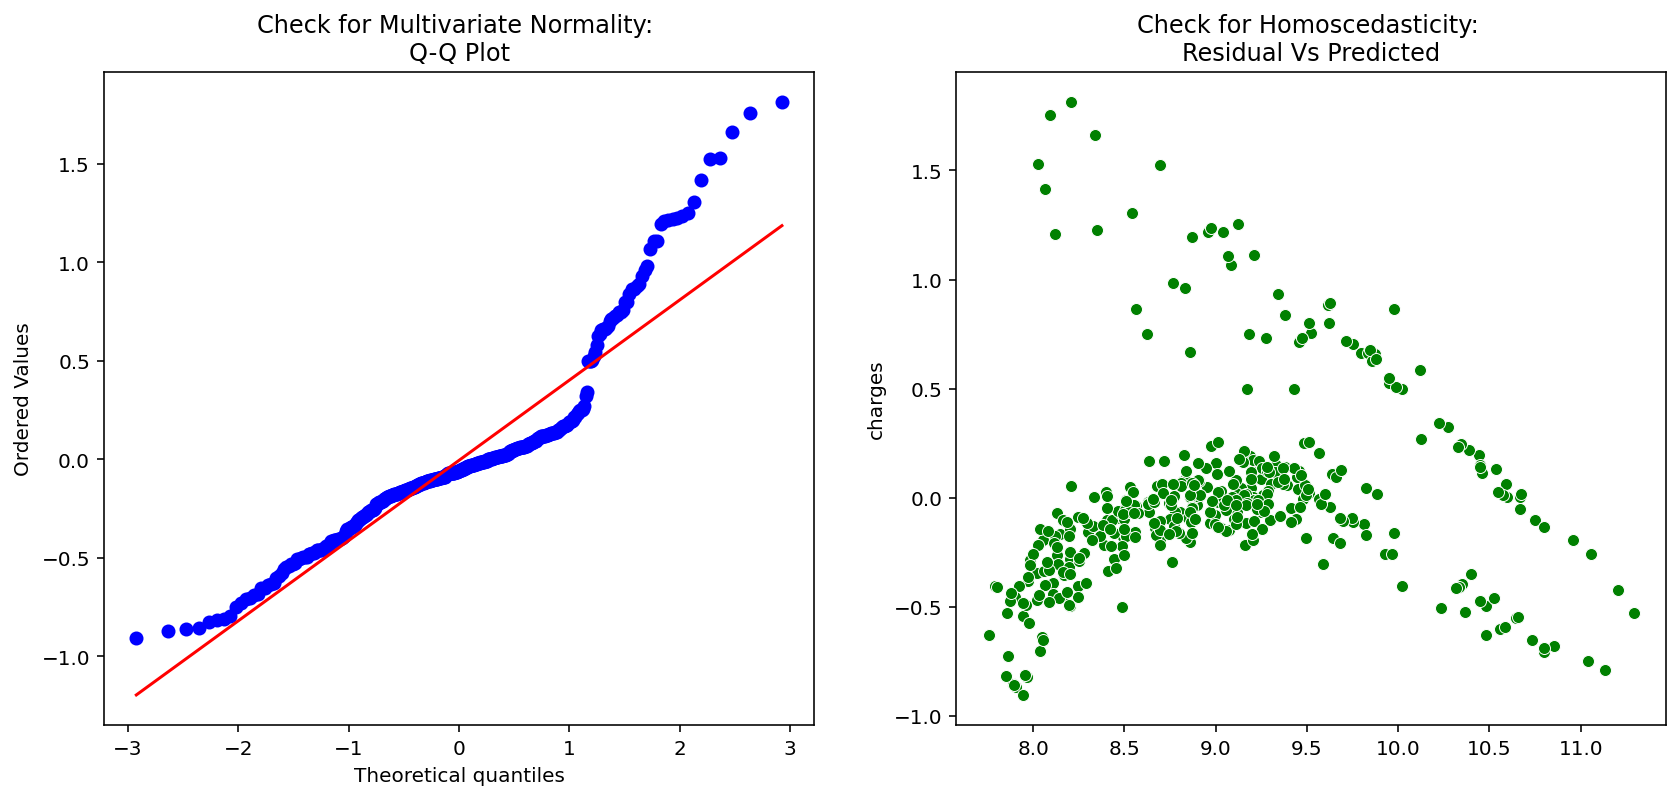

In [32]:
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_test),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

sns.scatterplot(y = (y_test - y_pred_test), x= y_pred_test, ax = ax[1],color='g') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [33]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_test)
VIF

4.536561945911138

In [34]:
y_pred_test_df = pd.DataFrame(y_pred_test, columns = ['Prediccion'])
y_pred_test_df.reset_index().drop('index', axis = 1)
test_comp = pd.concat([X_test['age'], y_test], axis = 1)
test_comp = test_comp.reset_index().drop('index', axis=1)
test_comp = test_comp.join(y_pred_test_df)
test_comp

,age,charges,Prediccion
0,61,9.475924,9.328027
1,31,8.523428,8.665157
2,35,9.951520,10.349459
3,50,10.152555,9.085704
4,26,8.071295,8.407991
...,...,...,...
397,25,8.073648,8.184626
398,41,9.527009,8.861191
399,39,9.853418,10.481768
400,18,7.035620,7.896219


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value')

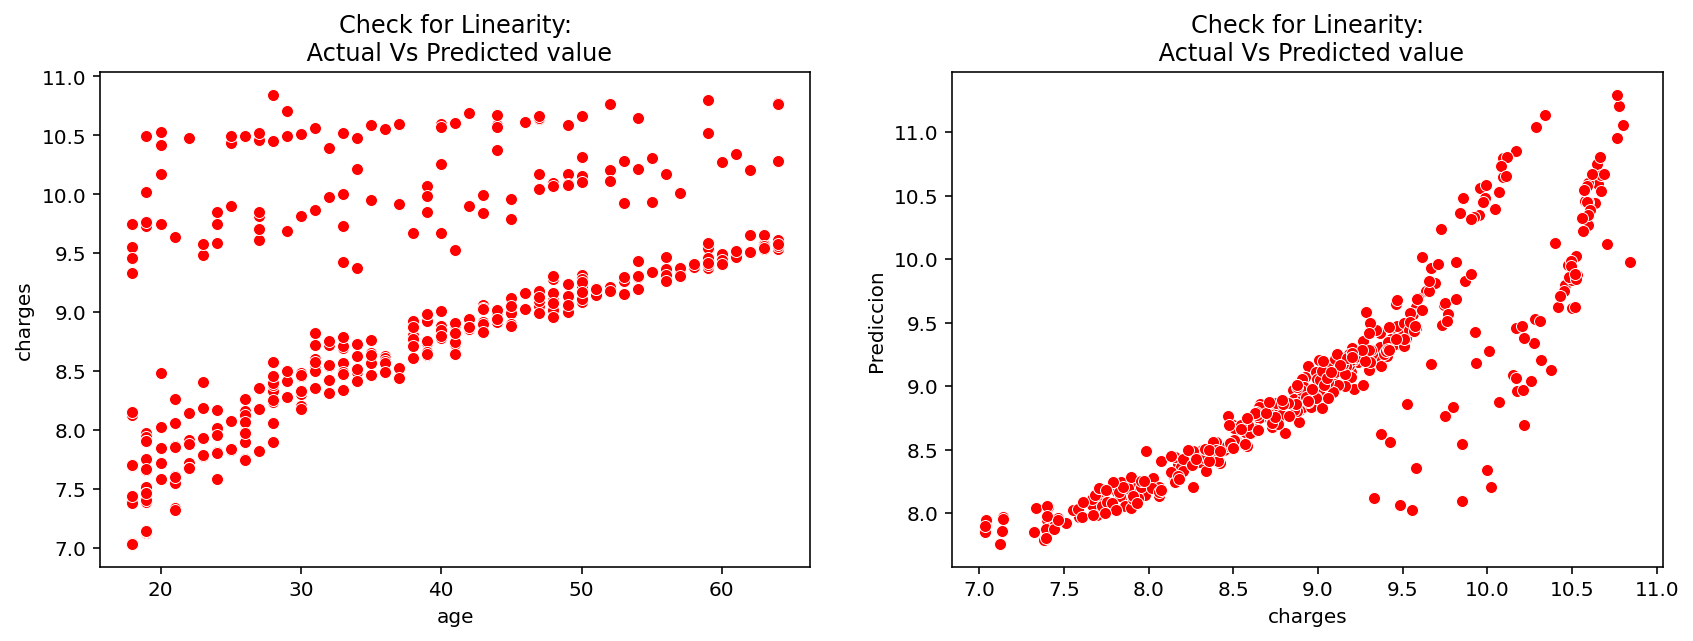

In [35]:
f = plt.figure(figsize=(14,10))
ax = f.add_subplot(221)
sns.scatterplot(x = test_comp.age, y = test_comp.charges,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(222)
sns.scatterplot(x = test_comp.charges, y = test_comp.Prediccion,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

#ax = f.add_subplot(223)
#sns.regplot(x =test_comp.charges, y = test_comp.Prediccion, ax = ax, order = 1)

In [36]:
prueba123 = test_comp.copy()
prueba123['charges'] =np.exp(test_comp['charges'])
prueba123['Prediccion']=np.exp(test_comp['Prediccion'])
prueba123

,age,charges,Prediccion
0,61,13041.92100,11248.916910
1,31,5031.26955,5797.356842
2,35,20984.09360,31240.144545
3,50,25656.57526,8828.182183
4,26,3201.24515,4482.745890
...,...,...,...
397,25,3208.78700,3585.403776
398,41,13725.47184,7052.877798
399,39,19023.26000,35659.393734
400,18,1136.39940,2687.103026


In [37]:
test_comp

,age,charges,Prediccion
0,61,9.475924,9.328027
1,31,8.523428,8.665157
2,35,9.951520,10.349459
3,50,10.152555,9.085704
4,26,8.071295,8.407991
...,...,...,...
397,25,8.073648,8.184626
398,41,9.527009,8.861191
399,39,9.853418,10.481768
400,18,7.035620,7.896219


In [38]:
test_comp

,age,charges,Prediccion
0,61,9.475924,9.328027
1,31,8.523428,8.665157
2,35,9.951520,10.349459
3,50,10.152555,9.085704
4,26,8.071295,8.407991
...,...,...,...
397,25,8.073648,8.184626
398,41,9.527009,8.861191
399,39,9.853418,10.481768
400,18,7.035620,7.896219
